In [32]:
import scripts as s
import numpy as np

import importlib

importlib.reload(s)

<module 'scripts' from '/Users/alfred/Documents/interpolation/scripts.py'>

In [23]:
interpolation_count = 22

# Hermite

In [ ]:
number_of_keyframes = 7

keyframes are: 
[[-7.95872202  3.77634426]
 [ 4.48855874  8.80380147]
 [-3.54313172  9.82873751]
 [ 3.13747142 -2.90006531]
 [-7.13503667 -9.90480911]
 [ 8.6583428  -1.71561041]
 [ 2.11305351  7.27292649]]

gradients are: 
[[  4.63453713  -9.41404062]
 [-11.80235506  11.06047468]
 [-17.30617343   7.43317692]
 [  0.19174289  -4.70347042]
 [  8.68342151  -0.38333523]
 [  4.10783996  15.13913464]
 [ -8.77824055  16.5014528 ]]


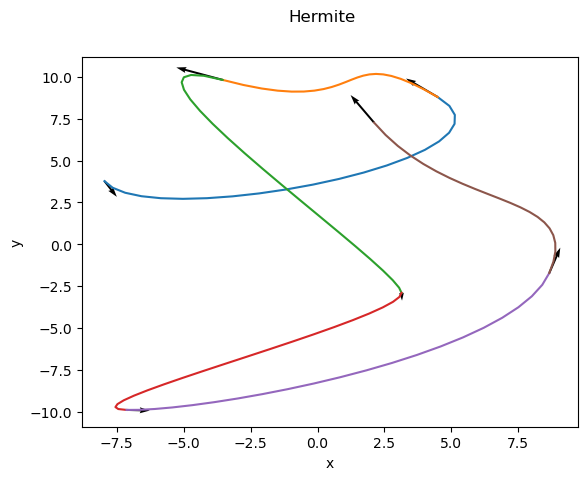

In [35]:
keyframes_x = 20 * np.random.random_sample(number_of_keyframes) - 10
keyframes_y = 20 * np.random.random_sample(number_of_keyframes) - 10
gradients_x = 40 * np.random.random_sample(number_of_keyframes) - 20
gradients_y = 40 * np.random.random_sample(number_of_keyframes) - 20

s.plot_interpolation_2d(keyframes_x, 
                        keyframes_y, 
                        gradients_x, 
                        gradients_y, 
                        s.hermite_interpolation_1d(keyframes_x, 
                                                   gradients_x, 
                                                   interpolation_count), 
                        s.hermite_interpolation_1d(keyframes_y, 
                                                   gradients_y, 
                                                   interpolation_count), 
                        "Hermite")

print("keyframes are: \n"
      f"{np.stack((keyframes_x, keyframes_y), axis=1)}\n"
      "\ngradients are: \n"
      f"{np.stack((gradients_x, gradients_y), axis=1)}")

# Catmull-Rom

In [36]:
number_of_keyframes = 9

keyframes are: 
[[-6.89934578 -9.91892185]
 [ 0.85355094  7.53575602]
 [ 4.27510028  0.9070831 ]
 [ 4.80388749 -8.3291284 ]
 [-1.87672111 -1.25473458]
 [-0.78840434 -4.10621564]
 [-9.1457905  -5.03617228]
 [ 6.08715031  7.7358109 ]
 [-5.77106052  4.76010779]]

gradients are: 
[[ 11.17444606  10.82600495]
 [  3.95033654 -15.86488442]
 [ -6.15182139  -2.16181768]
 [ -5.59229183   4.22291276]
 [ -7.26906939  -3.7814377 ]
 [  6.87555465  11.84202654]
 [  3.37472998   9.79628007]]


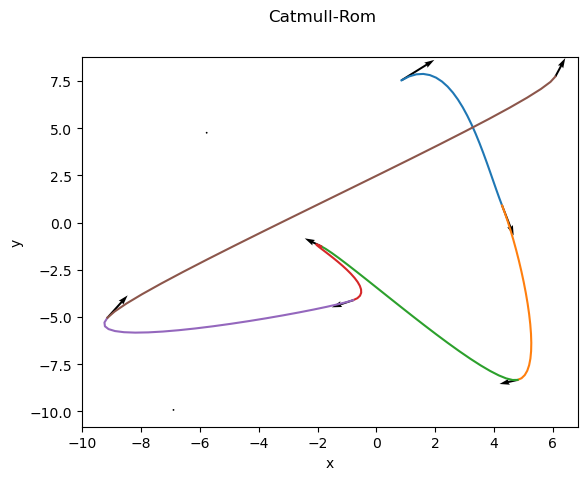

In [37]:
keyframes_x = 20 * np.random.random_sample(number_of_keyframes) - 10
keyframes_y = 20 * np.random.random_sample(number_of_keyframes) - 10

gradients_x = (np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[2:], 
                              np.zeros(shape=(1,)))) 
               - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[:-2], 
                              np.zeros(shape=(1,)))))

gradients_y = (np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[2:], 
                              np.zeros(shape=(1,)))) 
               - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[:-2], 
                              np.zeros(shape=(1,)))))

s.plot_interpolation_2d(keyframes_x, 
                        keyframes_y, 
                        gradients_x, 
                        gradients_y, 
                        s.catmullrom_spline_1d(keyframes_x, 
                                               interpolation_count), 
                        s.catmullrom_spline_1d(keyframes_y, 
                                               interpolation_count), 
                        "Catmull-Rom")

print("keyframes are: \n"
      f"{np.stack((keyframes_x, keyframes_y), axis=1)}\n"
      "\ngradients are: \n"
      f"{np.stack((gradients_x[1:-1], gradients_y[1:-1]), axis=1)}")